## Nur Anisah Fadhilah
## 202131020

## Import Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Frame

In [2]:
df = pd.read_csv ('R03_excercises.csv')#read file   
df#show file data

,Daily Exercise Time (X),Weight Loss (Y)
0,0.5,0.2
1,1.0,0.4
2,1.5,0.7
3,2.0,1.0
4,1.0,0.3
...,...,...
69,3.6,1.8
70,1.8,0.7
71,1.9,0.8
72,3.4,1.7


## Korelasi

In [3]:
df.corr() #pemanggilan metode

,Daily Exercise Time (X),Weight Loss (Y)
Daily Exercise Time (X),1.000000,0.990064
Weight Loss (Y),0.990064,1.000000


## EDA

In [4]:
df.info()#EDA (explanatory data analysis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Daily Exercise Time (X)  74 non-null     float64
 1   Weight Loss (Y)          74 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


## Preprocessing Data

In [5]:
X = df['Daily Exercise Time (X)'].values[:,np.newaxis] #Membuat Variabel X
Y = df['Weight Loss (Y)'].values #Membuat Variabel Y

In [6]:
summary_stats = df.describe() #Menghasilkan Ringkasan Statistik Deskriptif
print(summary_stats) #Mencetak Ringkasan Statistik

       Daily Exercise Time (X)  Weight Loss (Y)
count                74.000000        74.000000
mean                  2.124324         1.001351
std                   1.021121         0.567980
min                   0.400000         0.200000
25%                   1.225000         0.500000
50%                   2.050000         1.000000
75%                   2.975000         1.500000
max                   3.900000         2.000000


In [7]:
from sklearn.model_selection import train_test_split

#membagi dataset menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, test_size=0.2, 
                                                    random_state=42)

#cetak dimensi tiap variabel
print(f'X shape {X.shape}')
print(f'Y shape {Y.shape}')

print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'Y_train shape {Y_train.shape}')
print(f'Y_test shape {Y_test.shape}')

X shape (74, 1)
Y shape (74,)
X_train shape (59, 1)
X_test shape (15, 1)
Y_train shape (59,)
Y_test shape (15,)


## Pembuatan Model

In [8]:
from sklearn.linear_model import LinearRegression #Import Modul Linear Regression

lm = LinearRegression() #Inisialisasi Model Linear Regression
lm.fit(X_train,Y_train) #pelatihan model

LinearRegression()

In [9]:
Y_pred = lm.predict(X_test) #membuat prediksi

## Akurasi Model

In [10]:
from sklearn.metrics import mean_squared_error, r2_score #Import Modul Mean Squared Error

mse = mean_squared_error(Y_test, Y_pred) #Menghitung Mean Squared Error (MSE)
print(f'Mean Squared Error (MSE) :{mse}') #Mencetak Nilai MSE

Mean Squared Error (MSE) :0.002823995538817368


## Pengujian Model

In [11]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train) #konstanta ke fitur latih
results = sm.OLS(Y_train, X_train).fit() #Membuat dan Melatih Model OLS
results.summary() #Membuat dan Melatih Model OLS

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     2363.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           4.26e-48
Time:                        16:53:50   Log-Likelihood:                 61.910
No. Observations:                  59   AIC:                            -119.8
Df Residuals:                      57   BIC:                            -115.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1651      0.027     -6.042      0.000      -0.220      -0.110
x1             0.5499      0.011     48.614      0.000       0.527       0.573
==============================================================================
Omnibus:                        4.613   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                2.146
Skew:                           0.125   Prob(JB):                        0.342
Kurtosis:                       2.100   Cond. No.                         6.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Visualisasi Model

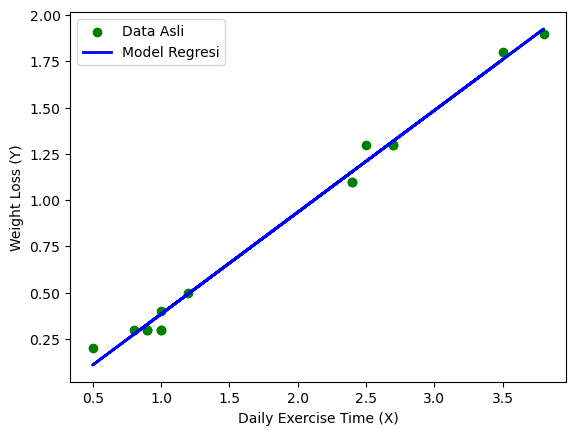

In [12]:
plt.scatter(X_test, Y_test, color='green', label='Data Asli')
plt.plot(X_test, Y_pred, color='blue', linewidth=2, label='Model Regresi')
plt.xlabel('Daily Exercise Time (X)')
plt.ylabel('Weight Loss (Y)')
plt.legend()
plt.show()

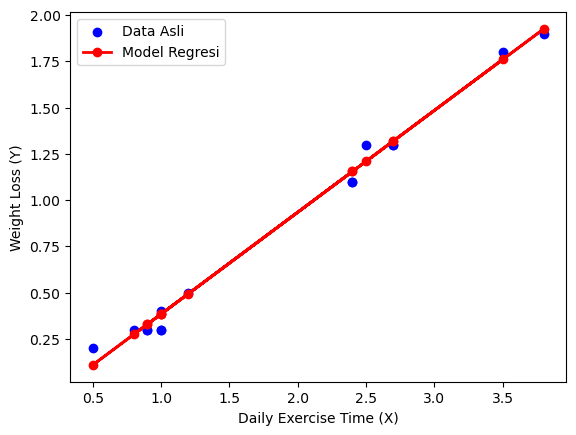

In [13]:
# Visualisasi model regresi dengan garis titik-titik penghubung
plt.scatter(X_test, Y_test, color='blue', label='Data Asli')
plt.plot(X_test, Y_pred, 'o-', color='red', linewidth=2, label='Model Regresi')
plt.xlabel('Daily Exercise Time (X)')
plt.ylabel('Weight Loss (Y)')
plt.legend()
plt.show()